# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv




# Import API key
import api_keys 
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
#get API key
api_key = api_keys.api_key

#URL for Weather Map API
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + api_key


# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="
query_url

# set up lists to hold the response data

temperature = []
humidity = []
cloudiness = []
windspeed = []
lat = []
lng = []
country = []
date = []
place = []

count = 0
print('Beginning Data Retrieval')    
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    count = count + 1
    try:
        print("Processing Record {} of Set 1 | {}".format(count,city))
        response = requests.get(query_url + city).json()
#         print(json.dumps(response,indent=4))
#         break
        place.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #print(json.dumps(response,indent=4))
        
    except KeyError:
        print("City not found. Skipping...")
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')        
# print(len(place))
# print(len(lat))
# print(len(lng))
# print(len(temp))
# print(len(humidity))
# print(len(wind))
# print(len(cloudiness))
# print(len(country))
# print(len(date))

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | san andres
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | rawson
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | burevestnik
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | warqla
City not found. Skipping...
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 21 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
#Create a dataframe with required items
weather_df = { 'City' : place,
             'Latitude' : lat,
             'Longitude' : lng,
             'Max Temperture' : temperature,
             'Humidity' : humidity,
             'Cloud coverage' : cloudiness,
             'Wind Speed' : windspeed,
             'Country' : country,
             'DateTime' : date,
}

# Display the DataFrame
new_weather_df = pd.DataFrame(weather_df)
new_weather_df.head()


,City,Latitude,Longitude,Max Temperture,Humidity,Cloud coverage,Wind Speed,Country,DateTime
0,San Andres,13.32,122.68,23.12,94,8,2.06,PH,1573396476
1,Mataura,-46.19,168.86,7.22,88,100,1.15,NZ,1573396476
2,Port Elizabeth,39.31,-74.98,7.89,61,90,3.60,US,1573396476
3,Hithadhoo,-0.60,73.08,28.14,74,0,4.41,MV,1573396476
4,Hilo,19.71,-155.08,18.97,69,1,0.97,US,1573396476


In [83]:
#save dataframe as csv
new_weather_df.to_csv(output_data_file, 'cities.csv')
output_data_file

TypeError: "delimiter" must be a 1-character string

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

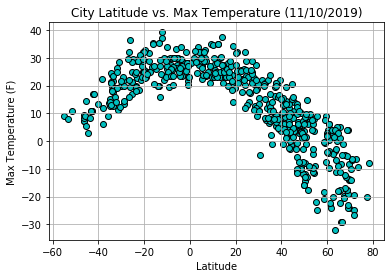

In [77]:
#Latitude vs. Temperature Plot
plt.scatter(lat, temperature, marker="o", facecolors="c", edgecolors="black")
plt.title("City Latitude vs. Max Temperature ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
#plt.savefig("LatitudevsTemp.png")
plt.savefig("../Images/LatitudevsTemp.png")


#### Latitude vs. Humidity Plot

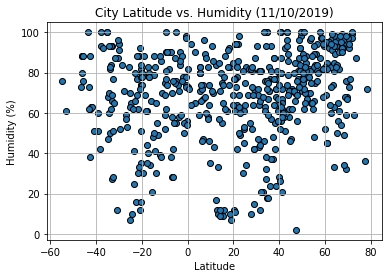

In [59]:
# Latitude vs. Humidity Plot

plt.scatter(lat,humidity,marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("LatitudevsHumidity.png")

#### Latitude vs. Cloudiness Plot

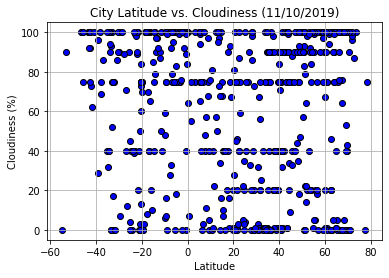

In [60]:
# Latitude vs. Cloudiness Plot

plt.scatter(lat,cloudiness,marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("LatitudevsCloudiness.png")

#### Latitude vs. Wind Speed Plot

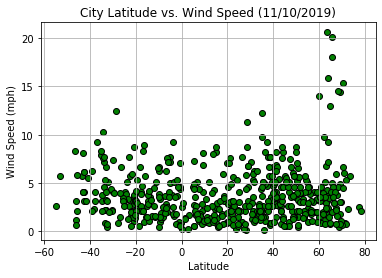

In [61]:
# Latitude vs. Wind Speed Plot

plt.scatter(lat,windspeed,marker="o", facecolors="green", edgecolors="black")
plt.title("City Latitude vs. Wind Speed ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("LatitudevsWind.png")